In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

2023-07-19 15:22:04.438444: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-19 15:22:04.785134: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-19 15:22:04.792837: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-19 15:22:06.835429: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

In [3]:
# x = (x - u) / std

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# x_train: [None, 28, 28] -> [None, 784]
x_train_scaled = scaler.fit_transform(
    x_train.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
x_valid_scaled = scaler.transform(
    x_valid.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
x_test_scaled = scaler.transform(
    x_test.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)

In [4]:
# tf.keras.models.Sequential()

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
for _ in range(20):
    model.add(keras.layers.Dense(100, activation="selu"))
#结果层
model.add(keras.layers.AlphaDropout(rate=0.2))
# AlphaDropout相对于普通Dropout优势: 1. 均值和方差不变 2. 归一化性质也不变
# model.add(keras.layers.Dropout(rate=0.5))
model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(0.001),
              metrics=["accuracy"])

In [5]:
tf.random.set_seed(0)
# layer = tf.keras.layers.Dropout(.5, input_shape=(2,))
layer = tf.keras.layers.AlphaDropout(0.2, input_shape=(2,))  #改为0.2和0.1来查看效果
data = np.arange(1,13).reshape(6, 2).astype(np.float32)
print(data)

[[ 1.  2.]
 [ 3.  4.]
 [ 5.  6.]
 [ 7.  8.]
 [ 9. 10.]
 [11. 12.]]


In [6]:
len(model.layers)

23

In [7]:
# Tensorboard, earlystopping, ModelCheckpoint
logdir = './dnn-selu-dropout-callbacks'
if not os.path.exists(logdir):
    os.mkdir(logdir)
output_model_file = os.path.join(logdir,
                                 "fashion_mnist_model.h5")

callbacks = [
    keras.callbacks.TensorBoard(logdir),
    keras.callbacks.ModelCheckpoint(output_model_file,
                                    save_best_only=True),
    keras.callbacks.EarlyStopping(patience=5, min_delta=1e-3),
]
history = model.fit(x_train_scaled, y_train, epochs=100,
                    validation_data=(x_valid_scaled, y_valid),
                    callbacks=callbacks)

Epoch 1/100
1719/1719 [==============================] - 15s 8ms/step - loss: 0.9227 - accuracy: 0.6833 - val_loss: 0.5672 - val_accuracy: 0.8154
Epoch 2/100
  16/1719 [..............................] - ETA: 11s - loss: 0.6566 - accuracy: 0.7773

/home/jiangpeng/.virtualenvs/tf2/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1719/1719 [==============================] - 13s 8ms/step - loss: 0.5804 - accuracy: 0.8004 - val_loss: 0.5196 - val_accuracy: 0.8364
Epoch 3/100
1719/1719 [==============================] - 13s 8ms/step - loss: 0.5035 - accuracy: 0.8264 - val_loss: 0.5016 - val_accuracy: 0.8464
Epoch 4/100
1719/1719 [==============================] - 13s 7ms/step - loss: 0.4577 - accuracy: 0.8409 - val_loss: 0.4820 - val_accuracy: 0.8486
Epoch 5/100
1719/1719 [==============================] - 13s 7ms/step - loss: 0.4276 - accuracy: 0.8504 - val_loss: 0.4489 - val_accuracy: 0.8612
Epoch 6/100
1719/1719 [==============================] - 13s 8ms/step - loss: 0.4043 - accuracy: 0.8570 - val_loss: 0.4230 - val_accuracy: 0.8636
Epoch 7/100
1719/1719 [==============================] - 13s 8ms/step - loss: 0.3875 - accuracy: 0.8629 - val_loss: 0.4152 - val_accuracy: 0.8668
Epoch 8/100
1719/1719 [==============================] - 13s 7ms/step - loss: 0.3720 - accuracy: 0.8683 - val_loss: 0.4294 - val_accurac

In [8]:
history.history

{'loss': [0.9227370619773865,
  0.5803525447845459,
  0.5034892559051514,
  0.45766642689704895,
  0.427581787109375,
  0.4042811095714569,
  0.3874823749065399,
  0.372010737657547,
  0.35994207859039307,
  0.34746184945106506,
  0.3390052318572998,
  0.32822009921073914,
  0.3216590881347656,
  0.31182006001472473,
  0.3061710596084595,
  0.2989684045314789,
  0.29353421926498413,
  0.2857654392719269,
  0.2801976501941681,
  0.27499228715896606],
 'accuracy': [0.6833090782165527,
  0.8004363775253296,
  0.8263636231422424,
  0.8409090638160706,
  0.8503817915916443,
  0.8570363521575928,
  0.862927258014679,
  0.868327260017395,
  0.8723090887069702,
  0.8774726986885071,
  0.8792909383773804,
  0.8832727074623108,
  0.8851272463798523,
  0.8883636593818665,
  0.8906000256538391,
  0.8935454487800598,
  0.8939818143844604,
  0.8976181745529175,
  0.9013636112213135,
  0.9014909267425537],
 'val_loss': [0.567177951335907,
  0.5196228623390198,
  0.5016447305679321,
  0.48201444745063

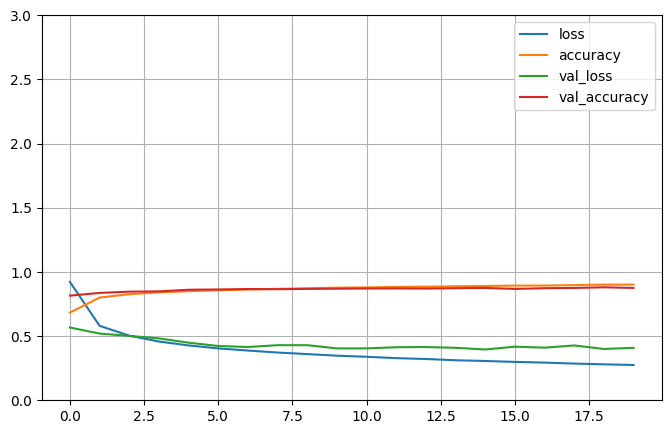

In [9]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 3)
    plt.show()

plot_learning_curves(history)

#如果初期变化效果不明显
# 1. 参数众多，训练不充分
# 2. 梯度消失 -> 链式法则 -> 复合函数f(g(x))求导，前期参数太多

In [10]:
model.evaluate(x_test_scaled, y_test, verbose=0)

[0.47404536604881287, 0.8618999719619751]